## First Method : Using SciPy

**Step 1. Import all necessary packages**

In [1]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Step 2. Load audio file**

In [2]:
samplerate, data = wavfile.read('SM7_F20_H092.wav')
print('Sample rate of the signal:',samplerate,"Hz")
print('Contents of the signal:',data)
print('Length of the signal:',len(data))

Sample rate of the signal: 44100 Hz
Contents of the signal: [-3494 -3489 -3382 ...   228   187    98]
Length of the signal: 132456


In [10]:
sample_rate, array= wavfile.read('SM7_F20_H092.wav')


44100 [-3494 -3489 -3382 ...   228   187    98]


In [14]:
counter = 0
for i in array:
    if counter>30:
        break
    else:
        print(i)
    counter+=1

-3494
-3489
-3382
-3165
-2824
-2366
-1828
-1281
-822
-549
-533
-786
-1214
-1635
-1862
-1794
-1483
-1079
-721
-455
-247
-50
128
238
256
212
169
176
250
375
550


In [3]:

import IPython

IPython.display.Audio(data,rate=samplerate)

In [17]:
times = np.arange(len(data))/float(samplerate) # Calculate the duration of the signal

# How times is different from data?
print('Minimum time (sec):', min(times))
print('Maximum time (sec):', max(times))
print('Minimum data point value:', min(data))
print('Maximum data point value:', max(data))

duration = len(data)/float(samplerate)

print('Duration of the audio in seconds: {:.2f}'.format(duration))

print('Number of samples:',len(data))

[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 3.00346939e+00
 3.00349206e+00 3.00351474e+00]
Minimum time (sec): 0.0
Maximum time (sec): 3.003514739229025
Minimum data point value: -8922
Maximum data point value: 12540
Duration of the audio in seconds: 3.00
Number of samples: 132456


**Step 3. Plot the raw signal (i.e. audio waveform)**

This is a time domain representation of an audio signal, where only time and corresponding amplitude information is available. This kind of representation does not provide much information.

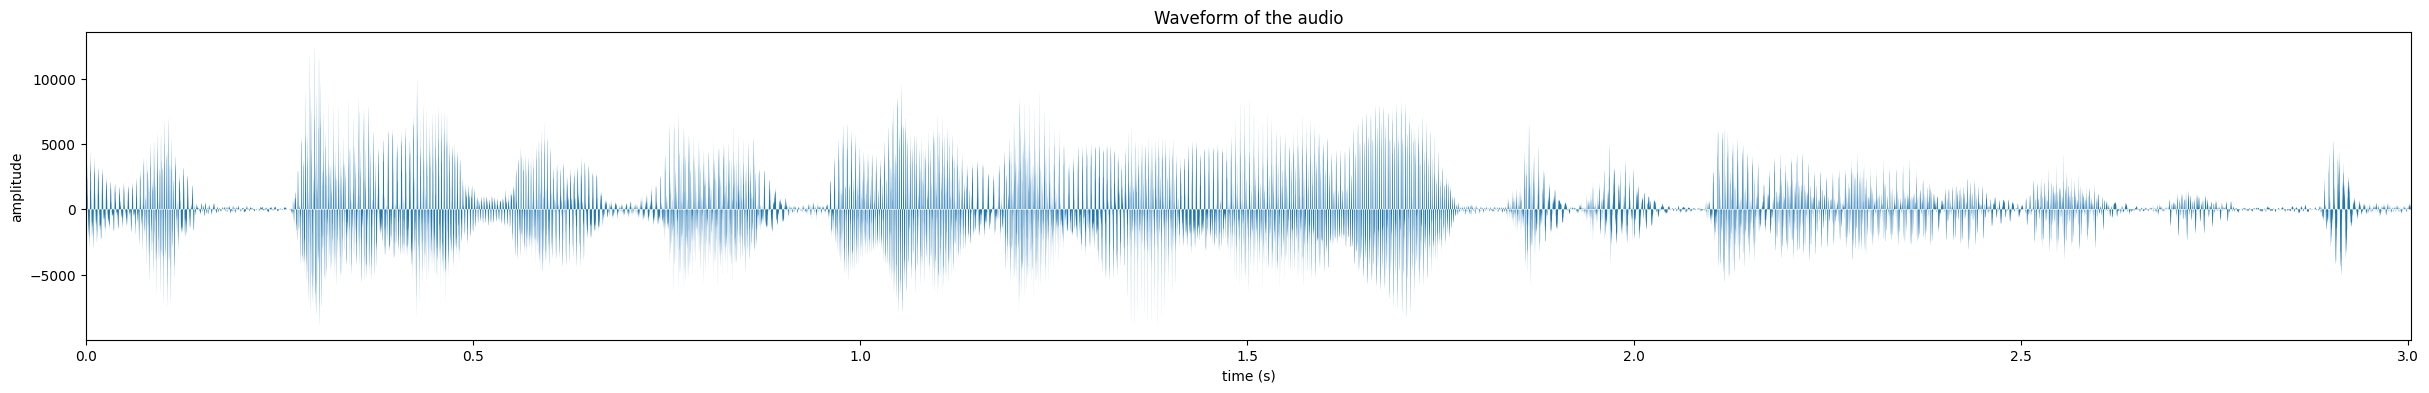

In [21]:
# Time domain representation
# Make the plot

plt.figure(figsize=(30, 4))

plt.fill_between(times, data)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.xlim(times[0],times[-1])
plt.title('Waveform of the audio')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot_scipy_audio.png', dpi=300)
plt.show()

**Step 4. Plot Frequency Spectrum**

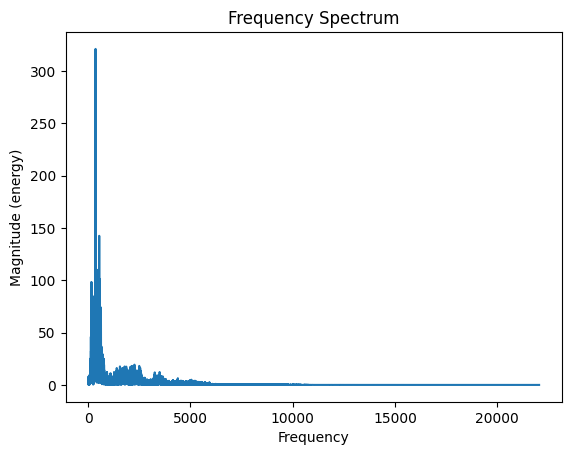

In [22]:
[a,b,c] = plt.magnitude_spectrum(data,Fs=samplerate)

plt.title('Frequency Spectrum')
plt.show()

# Second Method : Using Librosa

In [14]:
# !pip install numba --upgrade

In [24]:
import librosa

audio_path = 'SM7_F20_H092.wav'

x , sr = librosa.load(audio_path)
print(x.shape)
print("Sample rate:",sr)
print ("Array : ", x)
print("Duration of the signal in seconds: {:.2f}".format(len(x)/sr))

(66228,)
Sample rate: 22050
Array :  [-0.07904296 -0.11159094 -0.08117433 ...  0.00570112  0.00710472
  0.00548084]
Duration of the signal in seconds: 3.00


In [25]:
import IPython.display as ipd
ipd.Audio(audio_path)


**Visualizing audio files**

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

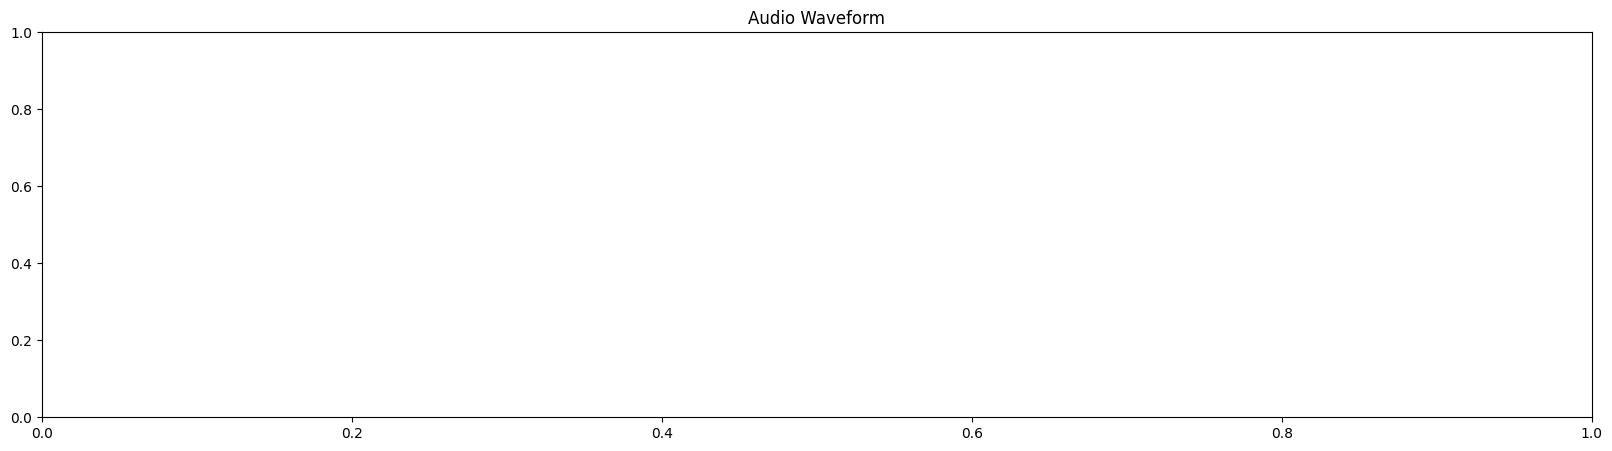

In [28]:
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.title('Audio Waveform')
librosa.display.waveshow(x, sr=sr)

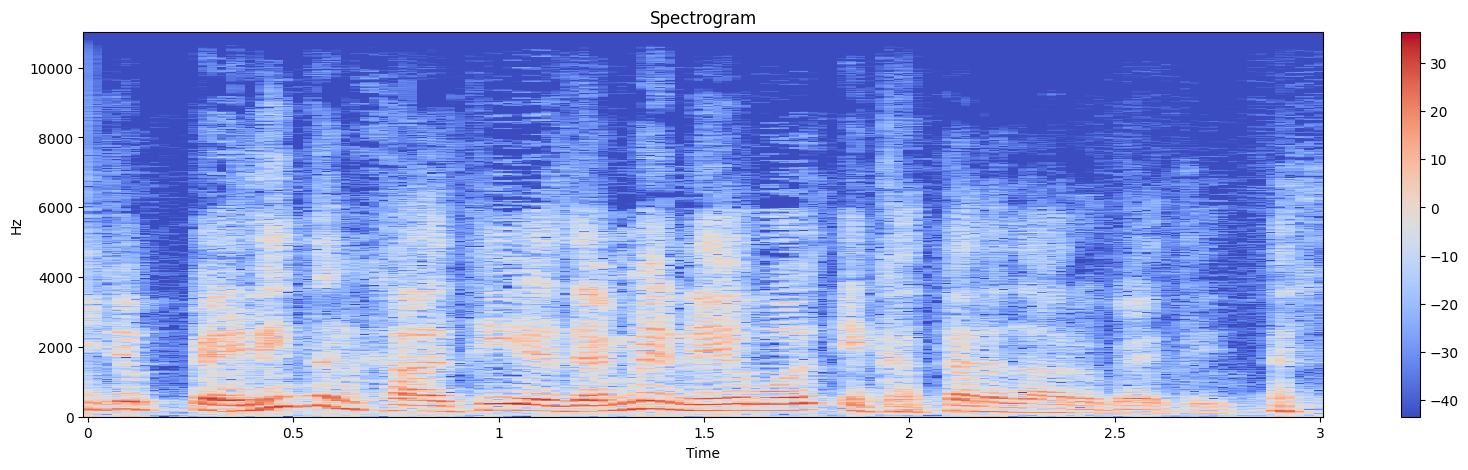

In [29]:
# This is spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram')
plt.colorbar()

In [7]:
import soundfile as sf

In [8]:
X, sample_rate = sf.read('SM7_F20_H092.wav', dtype='float32')
len(X)

132456

In [9]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(X, sr=sample_rate, hop_length=hop_length)
len(chromagram[0])

TypeError: chroma_stft() takes 0 positional arguments but 1 positional argument (and 2 keyword-only arguments) were given

In [10]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

NameError: name 'chromagram' is not defined

<Figure size 1500x500 with 0 Axes>

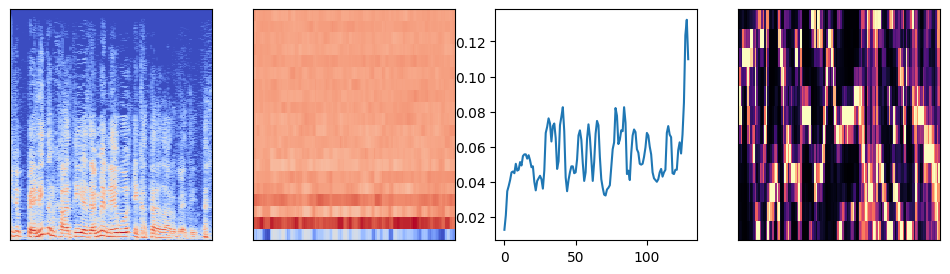

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

x, sr = librosa.load('./SM7_F20_H092.wav')
# ipd.Audio(x, rate=sr)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
mfccs = librosa.feature.mfcc(y=x, sr=sr)
zcrs = librosa.feature.zero_crossing_rate(x)
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=512)

fig, axs = plt.subplots(1, 4, figsize=(12,3))
librosa.display.specshow(Xdb, sr=sr, ax=axs[0])
librosa.display.specshow(mfccs, sr=sr, ax=axs[1])
axs[2].plot(zcrs[0])
librosa.display.specshow(chromagram, sr=sr, hop_length=512, ax=axs[3])

In [24]:
# Applying Short Term Fourier Transform
stft = np.abs(librosa.stft(X))
print (len(stft))

1025


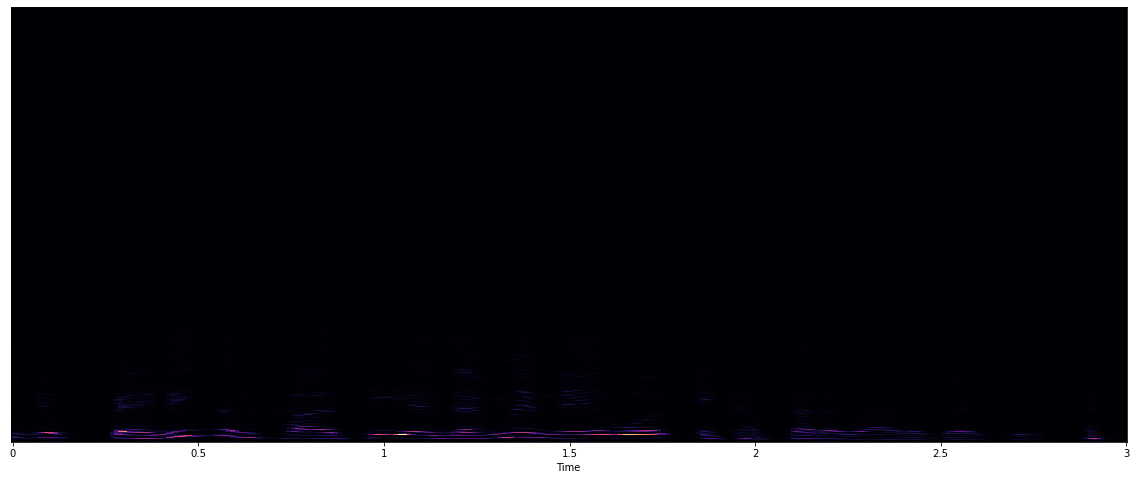

In [25]:
plt.figure(figsize=(20,8))
librosa.display.specshow(stft, sr=sample_rate, x_axis='time')

In [26]:
MFCC_Features = librosa.feature.mfcc(y=X, sr=sample_rate)
print (len(MFCC_Features))

20


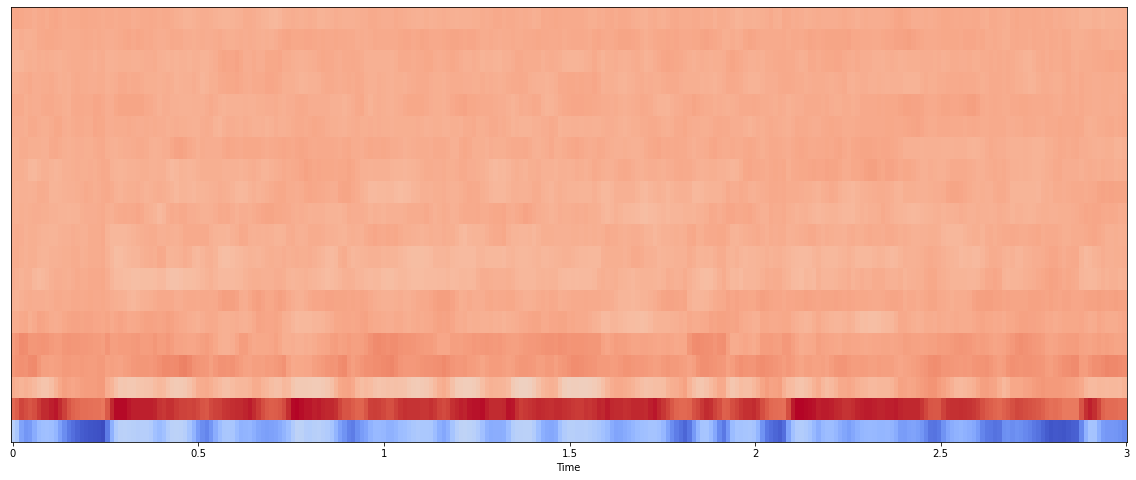

In [27]:
plt.figure(figsize=(20,8))
librosa.display.specshow(MFCC_Features, sr=sample_rate, x_axis='time')